# Importing relevant libraries

In [1]:
#libraries for dataframes and linear algebra & maths
import numpy as np
import pandas as pd
import math

In [2]:
#I need to read files from my local computer directories
import sys
import os
from os import listdir

In [38]:
#deeplearning and machine learning libraries

import tensorflow as tf

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

from keras.utils.np_utils import to_categorical
from keras.models import Model,Sequential, Input, load_model
from keras.layers import Activation, Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D, MaxPooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras import backend as K
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array

#Adding FastAI libraries
from fastai import *
from fastai.vision import *
%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [4]:
#for visual effects and plotting, counters
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
import cv2

# Reading and loading data from local machine

In [7]:
#defining glob vars for data
data = []
data_dir = "/Users/deshdeepak/ironhack/final_project/PlantVillage-Dataset/raw/color/"
train_dir = os.path.join(data_dir)
print(train_dir)

/Users/deshdeepak/ironhack/final_project/PlantVillage-Dataset/raw/color/


In [8]:
labels = []
for directory in os.listdir(train_dir):
  labels.append(directory)
print(labels)
print(str(len(labels)) + " classes")

['Strawberry___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Blueberry___healthy', 'Corn_(maize)___healthy', 'Tomato___Target_Spot', 'Peach___healthy', 'Potato___Late_blight', 'Tomato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Pepper,_bell___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Leaf_Mold', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Cherry_(including_sour)___Powdery_mildew', 'Apple___Cedar_apple_rust', 'Tomato___Bacterial_spot', 'Grape___healthy', 'Tomato___Early_blight', 'Corn_(maize)___Common_rust_', 'Grape___Esca_(Black_Measles)', 'Raspberry___healthy', 'Tomato___healthy', 'Cherry_(including_sour)___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Apple___Apple_scab', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Peach___Bacterial_spot', 'Pepper,_bell___Bacterial_spot', 'Tomato___Septoria_leaf_spot', 'Squash___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Apple___B

In [9]:
# function to convert images to array
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size) #gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [11]:
train_data = []
try:
    #print("[INFO] Loading images ...")
    #root_dir = listdir()
    for directory in train_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            train_dir.remove(directory)


    for defects_id, sp in enumerate(labels):
        for file in os.listdir(os.path.join(train_dir, sp)):
            train_data.append(['{}/{}'.format(sp, file), defects_id, sp])
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")        
train = pd.DataFrame(train_data, columns=['File', 'DiseaseID','Disease Type'])
train

[INFO] Image loading completed


,File,DiseaseID,Disease Type
0,Strawberry___healthy/8f558908-aa1b-4a86-855a-5...,0,Strawberry___healthy
1,Strawberry___healthy/b8e9ed27-8e37-4214-9206-f...,0,Strawberry___healthy
2,Strawberry___healthy/abdd34a0-ab02-41e0-95a3-a...,0,Strawberry___healthy
3,Strawberry___healthy/d1aee44a-b6bb-45b9-b7b6-5...,0,Strawberry___healthy
4,Strawberry___healthy/3d28c3ea-8419-4e09-addd-2...,0,Strawberry___healthy
...,...,...,...
54300,Soybean___healthy/57c18b39-2a33-471f-91eb-a9ba...,37,Soybean___healthy
54301,Soybean___healthy/4fdc663e-a8ea-4d8a-801b-ef18...,37,Soybean___healthy
54302,Soybean___healthy/df807f13-078b-4a6a-9c23-e43e...,37,Soybean___healthy
54303,Soybean___healthy/60bf9858-951a-4b56-906e-3c1b...,37,Soybean___healthy


In [42]:
type(labels)

list

In [44]:
type(train_data)

list

In [12]:
len(train_data)

54305

In [13]:
#reshuffling the sample as DiseaseID was sorted by 0....37
train = train.sample(frac=1, random_state=42) 
train.index = np.arange(len(train)) # Resetting index
train

,File,DiseaseID,Disease Type
0,Tomato___Late_blight/4fd803b3-c615-4d9e-9bee-5...,8,Tomato___Late_blight
1,Apple___healthy/8d45fcf9-d1c1-47b6-be37-6e3d2f...,34,Apple___healthy
2,Tomato___Tomato_Yellow_Leaf_Curl_Virus/8026acb...,24,Tomato___Tomato_Yellow_Leaf_Curl_Virus
3,Tomato___Septoria_leaf_spot/69624cd3-6e0a-4853...,30,Tomato___Septoria_leaf_spot
4,Strawberry___Leaf_scorch/ee921a9c-1761-4859-85...,35,Strawberry___Leaf_scorch
...,...,...,...
54300,"Pepper,_bell___healthy/c6dfe386-62c3-464d-8815...",10,"Pepper,_bell___healthy"
54301,Squash___Powdery_mildew/65483846-0b08-4a10-b45...,31,Squash___Powdery_mildew
54302,Tomato___Spider_mites Two-spotted_spider_mite/...,27,Tomato___Spider_mites Two-spotted_spider_mite
54303,Grape___Black_rot/6dc433e2-eb64-4e1d-8a79-12c5...,1,Grape___Black_rot


In [14]:
train['DiseaseID'].value_counts() #36 types of disease

11    5507
24    5357
37    5090
28    2297
16    2127
8     1909
31    1835
30    1771
27    1676
34    1645
22    1591
3     1502
10    1478
5     1404
20    1383
19    1192
1     1180
4     1162
35    1109
13    1076
14    1052
7     1000
2     1000
18    1000
29     997
26     985
12     952
23     854
25     630
33     621
32     513
0      456
17     423
9      373
21     371
6      360
15     275
36     152
Name: DiseaseID, dtype: int64

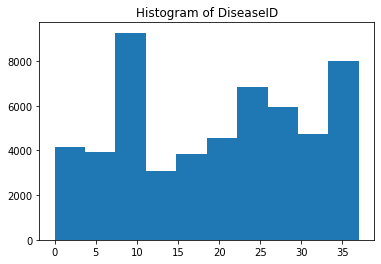

<Figure size 1080x1080 with 0 Axes>

In [15]:
plt.hist(train['DiseaseID'])
plt.title('Histogram of DiseaseID')
plt.figure(figsize=(15, 15))
plt.show()

In [16]:
#defining image helpers

def read_image(filepath):
    return cv2.imread(os.path.join(data_dir, filepath)) 
# Loading a color image is the default flag

#resize image to target size

def resize_image(image, image_size):
    return cv2.resize(image.copy(), image_size, interpolation=cv2.INTER_AREA)

## Train-Test split

In [17]:
imagesize = 64

X_train = np.zeros((train.shape[0], imagesize, imagesize, 3))
for i, file in tqdm(enumerate(train['File'].values)):
    image = read_image(file)
    if image is not None:
        X_train[i] = resize_image(image, (imagesize, imagesize))


54305it [05:59, 151.17it/s]


In [23]:

display(X_train[0])
display(X_train[0].shape)

array([[[ 99., 104., 125.],
        [ 99., 104., 125.],
        [ 93.,  98., 119.],
        ...,
        [155., 158., 173.],
        [158., 161., 176.],
        [156., 159., 174.]],

       [[ 97., 102., 123.],
        [ 97., 102., 123.],
        [ 99., 104., 125.],
        ...,
        [159., 162., 177.],
        [158., 161., 176.],
        [156., 159., 174.]],

       [[ 91.,  96., 117.],
        [101., 106., 127.],
        [ 96., 101., 122.],
        ...,
        [155., 158., 173.],
        [161., 164., 179.],
        [158., 161., 176.]],

       ...,

       [[ 93.,  99., 118.],
        [ 98., 104., 123.],
        [107., 113., 132.],
        ...,
        [165., 172., 189.],
        [164., 171., 188.],
        [167., 174., 191.]],

       [[101., 107., 126.],
        [ 99., 105., 124.],
        [103., 109., 128.],
        ...,
        [166., 173., 190.],
        [165., 172., 189.],
        [161., 168., 185.]],

       [[104., 110., 129.],
        [104., 110., 129.],
        [108., 1

(64, 64, 3)

In [24]:
file_path = '/Users/deshdeepak/ironhack/final_project/PlantVillage-Dataset/raw/color/Potato___Early_blight/0faca7fe-7254-4dfa-8388-bbc776338c9c___RS_Early.B 7929.JPG'

In [25]:
dir_name = os.path.dirname(file_path)
dir_name

'/Users/deshdeepak/ironhack/final_project/PlantVillage-Dataset/raw/color/plantvillage/PlantVillage/Potato___Early_blight'

In [26]:
# Normalize the data
X_train_norm = X_train / 255 
print('Train Shape: {}'.format(X_train_norm.shape))

Train Shape: (54305, 64, 64, 3)


In [27]:
# Flatten the images. Images are to be input as vector
X_train_fl_no = X_train_norm.reshape((-1, 4096))
print('Train Shape: {}'.format(X_train_fl_no.shape))
#test_images = test_images.reshape((-1, 784))

Train Shape: (162915, 4096)


In [28]:
Y_train = train['DiseaseID'].values
Y_train_labels = to_categorical(Y_train) #encoding into array with values-- 1 and 0

In [29]:
Y_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [30]:
Y_train_labels.shape

(54305, 38)

In [31]:
# Normalize the data
Y_train_norm = (Y_train_labels/255)
#Y_train = Y_train_labels.reshape((-1, 784))


In [32]:
Y_train_norm.shape

(54305, 38)

In [33]:
X_train.shape

(54305, 64, 64, 3)

In [34]:
Y_train.shape

(54305,)

In [52]:
#do not need to split for fastai
# Split the train and validation sets 
X_train, X_test, Y_train, Y_test = train_test_split(X_train_norm, Y_train_labels, test_size=0.2, random_state=42)

# Modeling with ResUNet

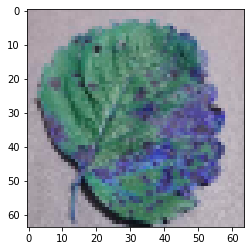

In [54]:
img = X_train[100]
plt.imshow(img)

In [56]:
def plot_rgb_hist(image):
  
  '''
  This method will plot the histogram of the 
  RGB values of an image.
  -----------------------------------
  Arguments
  image - the image for which to plot the histogram
  -----------------------------------

  '''
  #extract the red channel
  im= image[:, :, 0]
  plt.hist(im.ravel(), bins = 256, \
           color = 'Red', alpha = 0.5)
  
  #extract the green color
  im= image[:, :, 1]
  plt.hist(im.ravel(), bins = 256, \
           color = 'Green', alpha = 0.5)
  
  #extract the blue color
  im= image[:, :, 2]
  plt.hist(im.ravel(), bins = 256, \
           color = 'Blue', alpha = 0.5)
  plt.show()

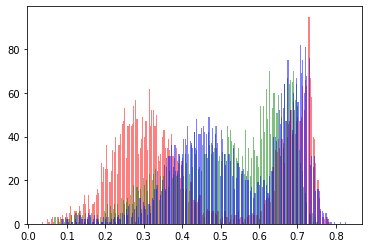

In [57]:
plot_rgb_hist(img)

In [68]:
from tensorflow.keras.applications.resnet50 import ResNet50



In [82]:
clf_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_tensor=Input(shape=(64,64,3)),
    input_shape=None,
    pooling=None,
    classes=38
)

In [75]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import cv2
import skimage

from skimage import io

import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
import tensorflow.keras.backend as K

import random
import glob
from sklearn.preprocessing import StandardScaler, normalize
from IPython.display import display

In [76]:
for layer in clf_model.layers:
    layers.trainable = False

In [86]:
head = clf_model.output
head = AveragePooling2D(pool_size=(2,2))(head)
head = Flatten(name='Flatten')(head)
head = Dense(256, activation='relu')(head)
head = Dropout(0.3)(head)
head = Dense(256, activation='relu')(head)
head = Dropout(0.3)(head)
head = Dense(38, activation='softmax')(head)

In [87]:
model = Model(clf_model.input, head)
model.compile(loss = 'categorical_crossentropy', 
              optimizer='adam', 
              metrics= ["accuracy"]
             )
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 70, 70, 3)    0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 32, 32, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 32, 32, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [89]:

earlystopping = EarlyStopping(monitor='val_loss', 
                              mode='min', 
                              verbose=1, 
                              patience=15
                             )
checkpointer = ModelCheckpoint(filepath="clf-resnet-Model.hdf5", 
                               verbose=1, 
                               save_best_only=True
                              )
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              mode='min',
                              verbose=1,
                              patience=10,
                              min_delta=0.0001,
                              factor=0.2
                             )
callbacks = [checkpointer, earlystopping, reduce_lr]

In [92]:
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [95]:
historyrc = model.fit(
    aug.flow(X_train, Y_train, batch_size=64),
    epochs = 25,
    validation_data=(X_test, Y_test),
    steps_per_epoch=len(X_train) // 64,
    callbacks=[checkpointer, earlystopping]
)



Epoch 1/25
678/678 [==============================] - 2490s 4s/step - loss: 0.8926 - accuracy: 0.7572 - val_loss: 8.4443 - val_accuracy: 0.0290

Epoch 00001: val_loss improved from inf to 8.44425, saving model to clf-resnet-Model.hdf5


/usr/local/Cellar/jupyterlab/3.0.15_1/libexec/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/25
678/678 [==============================] - 2614s 4s/step - loss: 0.4339 - accuracy: 0.8779 - val_loss: 10.5696 - val_accuracy: 0.1178

Epoch 00002: val_loss did not improve from 8.44425
Epoch 3/25
678/678 [==============================] - 2589s 4s/step - loss: 0.3723 - accuracy: 0.8957 - val_loss: 0.9934 - val_accuracy: 0.7357

Epoch 00003: val_loss improved from 8.44425 to 0.99344, saving model to clf-resnet-Model.hdf5
Epoch 4/25
678/678 [==============================] - 3072s 5s/step - loss: 0.2469 - accuracy: 0.9286 - val_loss: 0.7755 - val_accuracy: 0.7960

Epoch 00004: val_loss improved from 0.99344 to 0.77553, saving model to clf-resnet-Model.hdf5
Epoch 5/25
678/678 [==============================] - 3801s 6s/step - loss: 0.2211 - accuracy: 0.9364 - val_loss: 2.5756 - val_accuracy: 0.5447

Epoch 00005: val_loss did not improve from 0.77553
Epoch 6/25
678/678 [==============================] - 3736s 6s/step - loss: 0.2084 - accuracy: 0.9392 - val_loss: 0.7705 - val_ac

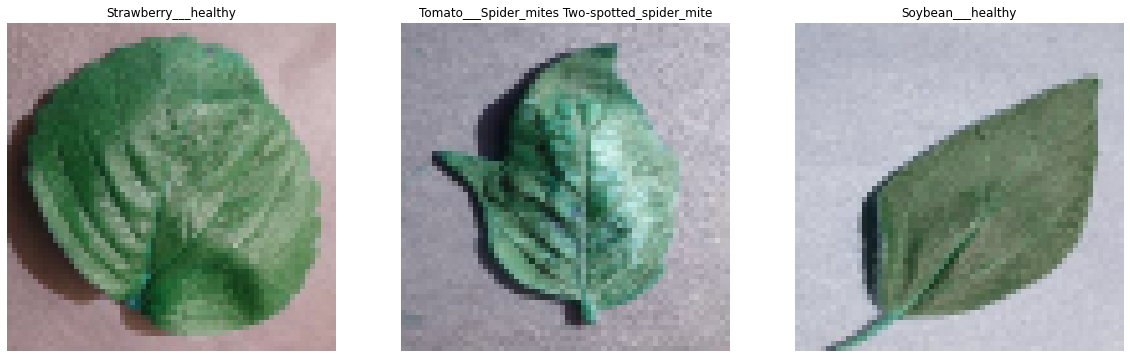

In [96]:
fig, ax = plt.subplots(1, 3, figsize=(20,20))
for i in range(3):
    ax[i].set_axis_off()
    ax[i].imshow(X_train[i])
    ax[i].set_title(labels[np.argmax(Y_train[i])])

In [97]:
#for first iteration with history
final_loss, final_accuracy = model.evaluate(X_test, Y_test)
print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))

340/340 [==============================] - 82s 242ms/step - loss: 0.2333 - accuracy: 0.9385
Final Loss: 0.2332773506641388, Final Accuracy: 0.9384955167770386


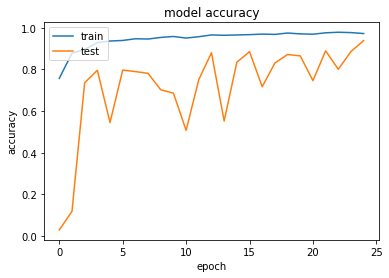

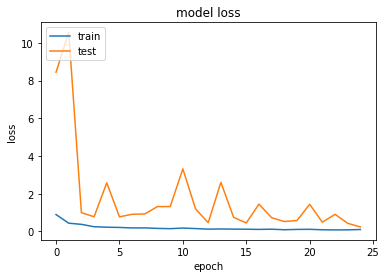

In [99]:
#for first iteration with history
#accuracy plot for epoch = 30
plt.plot(historyrc.history['accuracy'])
plt.plot(historyrc.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#loss plot for epoch = 30
plt.plot(historyrc.history['loss'])
plt.plot(historyrc.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Text(0.5, 255.29374999999993, 'Predicted')

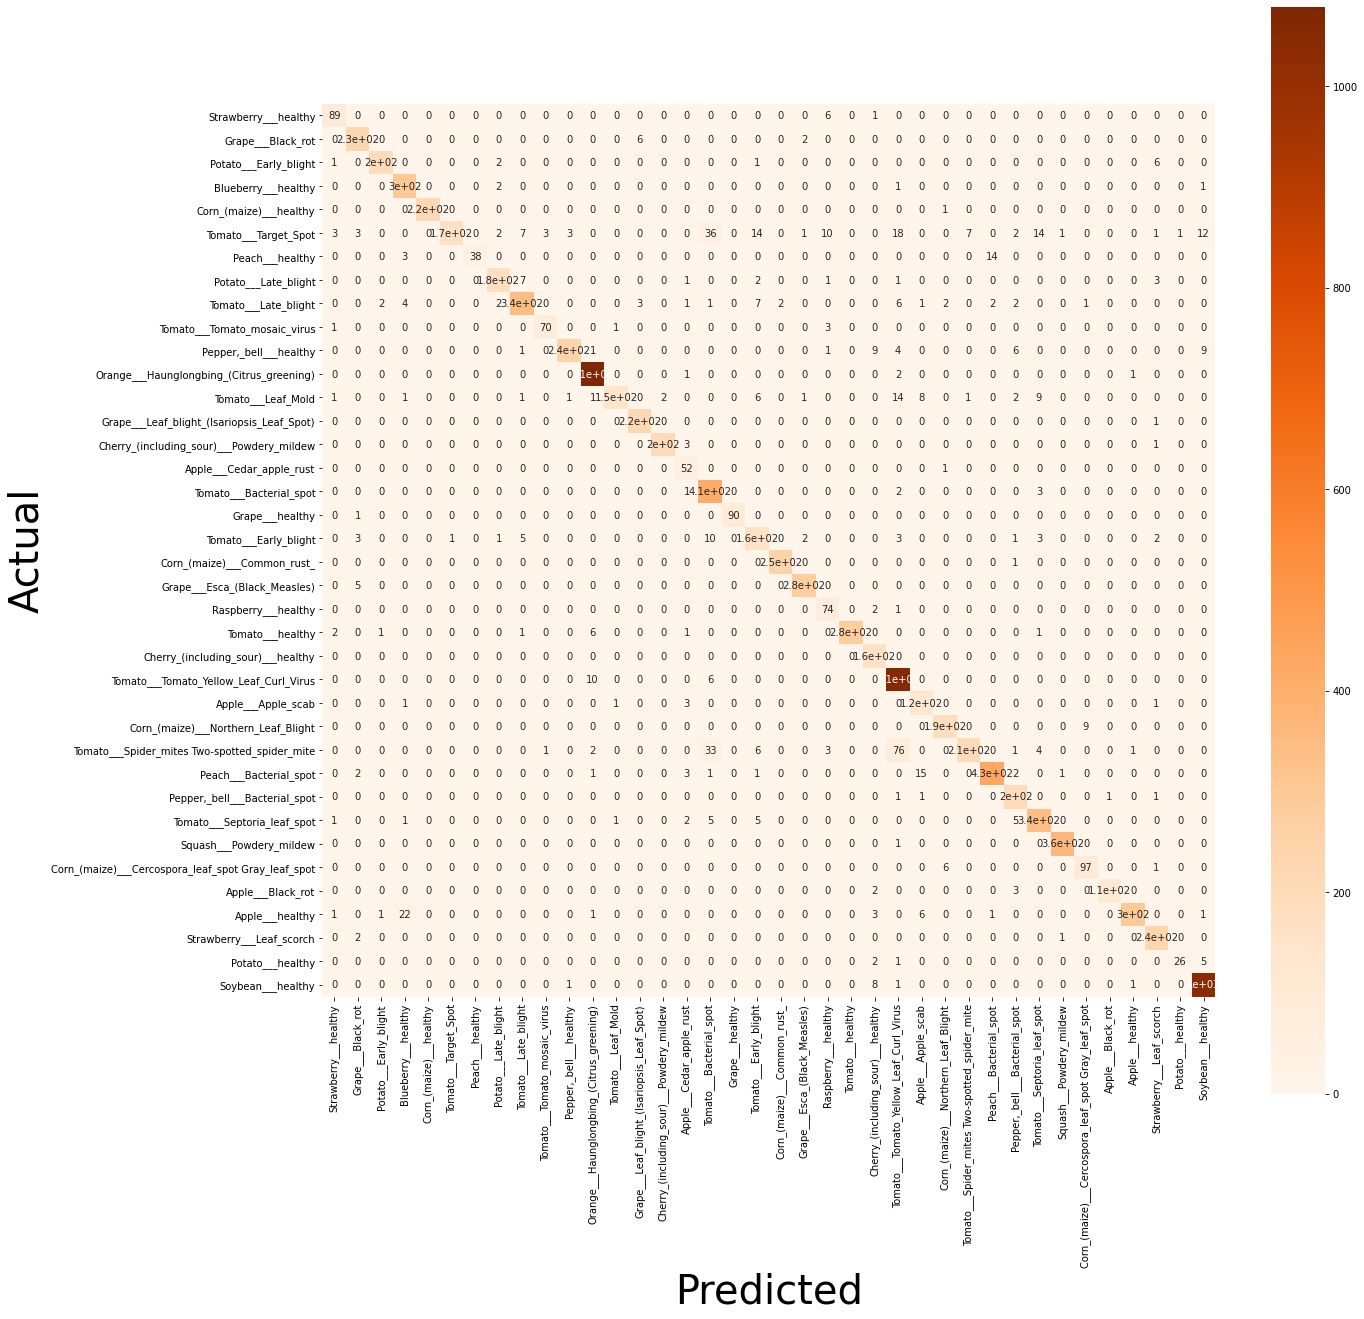

In [100]:
#for first iteration with history
Y_pred = model.predict(X_test)

Y_pred = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_test, axis=1)
import seaborn as sns
cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(20, 20))
ax = sns.heatmap(cm, cmap=plt.cm.Oranges, annot=True, square=True, xticklabels=labels, yticklabels=labels)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

Prediction: Strawberry___Leaf_scorch
Result: Strawberry___Leaf_scorch


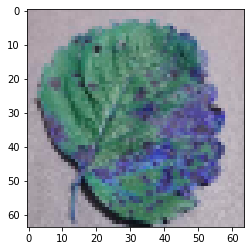

In [106]:
#for first iteration
test=X_train[100]
test=test.reshape((-1,64,64,3))
predictions = model.predict(test)
print("Prediction: "+ labels[np.argmax(predictions)])
print("Result: " + labels[np.argmax(Y_train[100])])
plt.imshow(X_train[100])

Prediction: Strawberry___healthy
Result: Strawberry___healthy
Prediction: Tomato___Tomato_Yellow_Leaf_Curl_Virus
Result: Tomato___Spider_mites Two-spotted_spider_mite
Prediction: Soybean___healthy
Result: Soybean___healthy
Prediction: Grape___Black_rot
Result: Grape___Black_rot
Prediction: Tomato___healthy
Result: Tomato___healthy


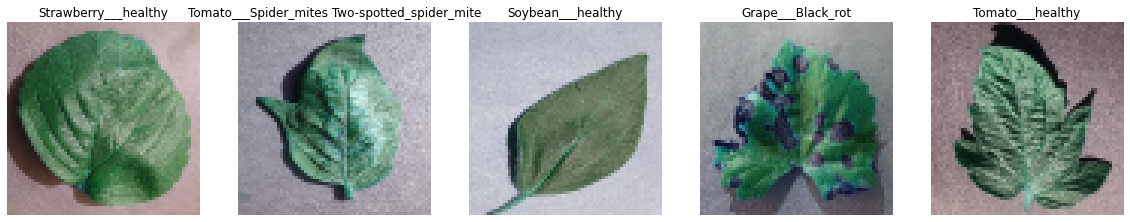

In [155]:
fig, ax = plt.subplots(1, 5, figsize=(20,20))
for i in range(5):
    test=X_train[i]
    test=test.reshape((-1,64,64,3))
    predictions = model.predict(test)
    print("Prediction: "+ labels[np.argmax(predictions)])
    print("Result: " + labels[np.argmax(Y_train[i])])
    #plt.imshow(X_train[i])
    ax[i].set_axis_off()
    ax[i].imshow(X_train[i])
    ax[i].set_title(labels[np.argmax(Y_train[i])])
    


Prediction: Tomato___Late_blight
Result: Tomato___Late_blight


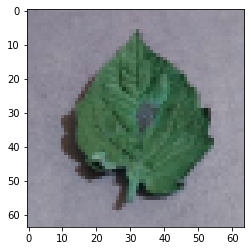

In [103]:
#for first iteration
test=X_train[5]
test=test.reshape((-1,64,64,3))
predictions = model.predict(test)
print("Prediction: "+ labels[np.argmax(predictions)])
print("Result: " + labels[np.argmax(Y_train[5])])
plt.imshow(X_train[5])

Prediction: Blueberry___healthy
Result: Blueberry___healthy


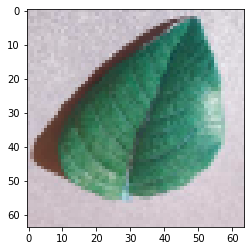

In [105]:
#for first iteration
test=X_train[8]
test=test.reshape((-1,64,64,3))
predictions = model.predict(test)
print("Prediction: "+ labels[np.argmax(predictions)])
print("Result: " + labels[np.argmax(Y_train[8])])
plt.imshow(X_train[8])

Prediction: Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Result: Grape___Leaf_blight_(Isariopsis_Leaf_Spot)


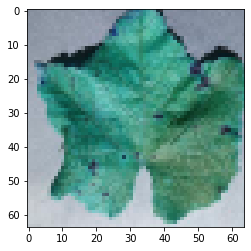

In [108]:
#for first iteration
test=X_train[10000]
test=test.reshape((-1,64,64,3))
predictions = model.predict(test)
print("Prediction: "+ labels[np.argmax(predictions)])
print("Result: " + labels[np.argmax(Y_train[10000])])
plt.imshow(X_train[10000])

In [1]:
from keras.applications.resnet50 import decode_predictions
default_image_size = tuple((64, 64))
def predict_disease(image_path):
    default_image_size = tuple((64, 64))
    image_array = convert_image_to_array(image_path)
    np_image = np.array(image_array, dtype=np.float32)
    print(np_image.dtype)
    np_image = np.expand_dims(np_image,0)
    print(np_image.shape)
    test=np_image.reshape((-1,64,64,3))
    plt.imshow(plt.imread(image_path))
    np_image_norm = np_image/255.0 
    result = model.predict(np_image) 
    print(result)
    list_result = list(result)
    loc = list_result[0]
    #print("Prediction1: "+ result[loc])
    print("Prediction from model: " + decode_predictions(result)[0])

In [ ]:
predict_disease('/Users/deshdeepak/Potato1.JPG')